Participation Notes – July 10, 2025  

**Course:** Data Visualization  
**Topics:** Visualization Beyond Matplotlib – Seaborn, Plotly, Wordclouds, and Venn Diagrams  

This notebook documents the participation activities for July 10, which explored a range of visualization tools beyond `matplotlib`. The session  focused on using `seaborn` for layered and semantic visual mappings, `plotly` for interactive visualizations, and the `wordcloud` and `matplotlib-venn` libraries for qualitative visual representation. Each tool's syntax and unique features were explored through hands-on examples, with attention given to use cases, benefits, and visual clarity.


In [2]:
# Load required libraries and generate data for the session
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns # Seaborn for statistical and aesthetic plots
import plotly.express as px # Plotly for interactive plots
from wordcloud import WordCloud # WordCloud for generating word frequency visuals
from matplotlib_venn import venn2, venn3 # Venn diagram support



Seaborn builds on top of Matplotlib to simplify statistical visualization.  
It provides high-level functions for common plot types and uses a layered approach where semantics and aesthetics are encoded through arguments like `hue`, `style`, and `size`.  
This makes it ideal for quickly generating informative, polished visualizations.


In [9]:
# Load a built-in dataset from seaborn
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips.head())



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


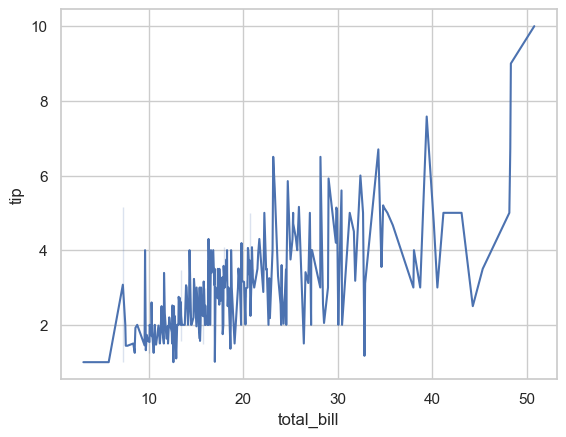

In [10]:
# Create a simple line plot showing tip amount vs total bill
sns.lineplot(data=tips, x='total_bill', y='tip')
plt.show()


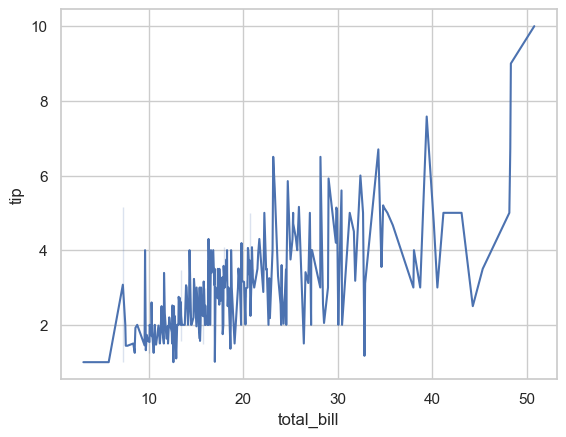

In [11]:
# Set the seaborn style for plot background and grid
sns.set_style('whitegrid')

# Redraw the lineplot with the new style
sns.lineplot(data=tips, x='total_bill', y='tip')
plt.show()


Seaborn allows easy styling. The 'whitegrid' style adds a light grid, making visual interpretation easier. Also tried with 'darkgrid','white','dark','ticks'



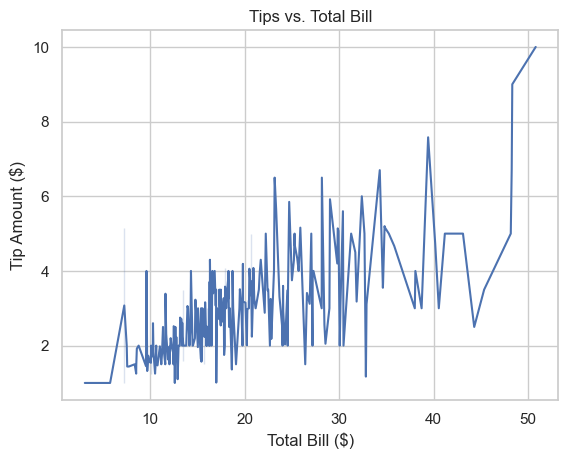

In [12]:
# Create the plot and assign to variable
tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip')

# Add a title and axis labels
tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')

plt.show()


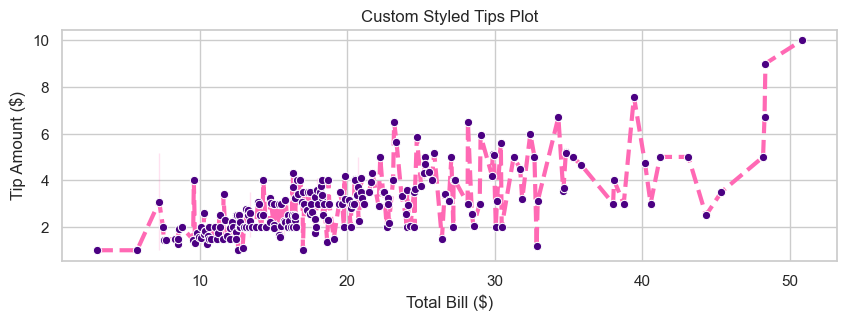

In [17]:
# Create a plot with a custom figure size
fig = plt.subplots(figsize=(10, 3))

# Redraw the seaborn line plot
tipgraph=sns.lineplot(
                        data=tips, 
                        x='total_bill', 
                        y='tip', 
                        color='hotpink',             # line color
                        linestyle='--',              # dashed line
                        linewidth=3,                 # line thickness
                        marker='o',                  # circle markers at data points
                        markerfacecolor='indigo'     # fill color of the marker
)

tipgraph.set(title='Custom Styled Tips Plot',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

plt.show()


The plt.subplots() function can be used to manually specify the dimensions of a plot figure. This allows for better control over layout, especially when exporting figures for reports or presentations. The figsize argument takes a tuple representing the width and height in inches.

Seaborn provides high-level control over visual style. Aesthetic properties such as line color, style (-- for dashed), width, and markers can be directly customized through function arguments. markerfacecolor sets the fill color of the data point markers, which can help highlight individual observations. These enhancements improve both readability and visual appeal.



----

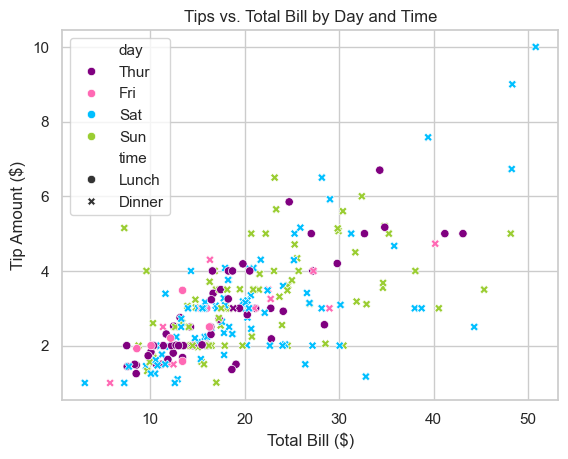

In [18]:
# Scatterplot showing time of day and day of the week using style and color
tipgraph = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    style='time',                 # Distinguishes Lunch vs. Dinner with marker shape
    hue='day',                    # Colors represent the day of the week
    palette=['purple', 'hotpink', 'deepskyblue', 'yellowgreen']  # Custom color palette
)

# Add plot title and axis labels
tipgraph.set(
    title='Tips vs. Total Bill by Day and Time',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)'
)

plt.show()


This scatterplot incorporates two additional categorical variables by mapping them to visual properties:

hue='day' uses color to distinguish between different days of the week.

style='time' varies the marker style based on whether the meal was during lunch or dinner.
This multivariate encoding enhances interpretability without overcomplicating the plot. A custom color palette can also be defined to align with thematic preferences or accessibility guidelines.

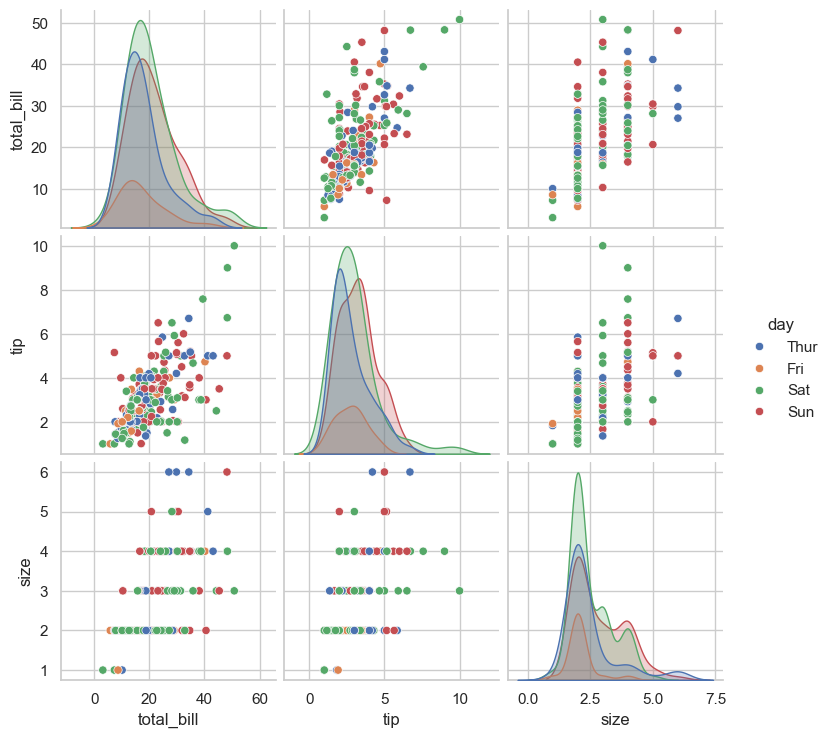

In [19]:
# Create a pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(
    data=tips,
    hue='day'    # Colors by day of the week
)
plt.show()


The pairplot() function generates a grid of scatterplots for each pairwise combination of numerical variables in the dataset. The diagonal displays kernel density estimates (or histograms) of individual variables. Using hue='day' overlays group information to facilitate comparisons across subsets. This type of plot is especially useful for identifying correlations and potential groupings in multidimensional datasets.



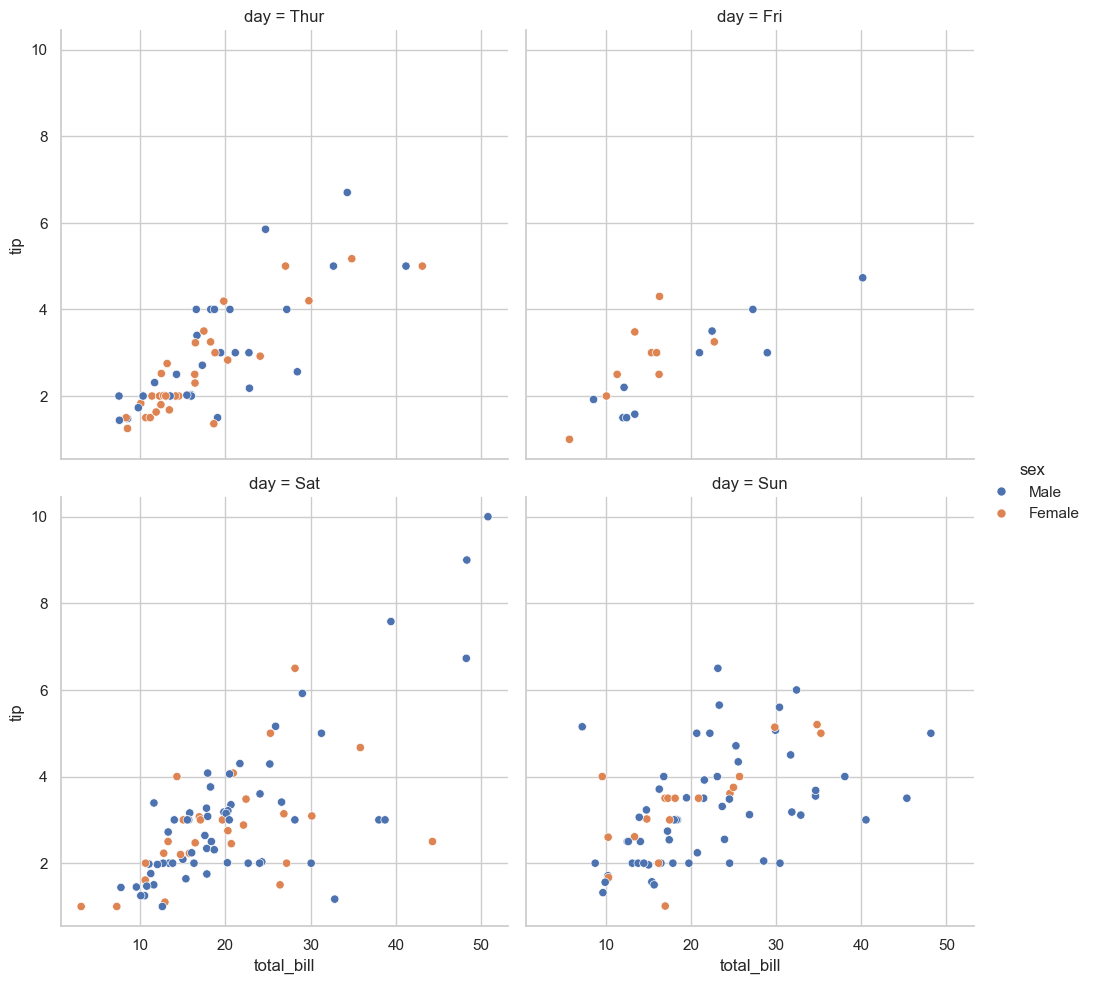

In [20]:
# Create a faceted scatterplot grouped by 'day' and colored by 'sex'
daysplot = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",         # Color points by gender
    col="day",         # Create separate plots for each day of the week
    kind="scatter",    # Use scatterplot style
    col_wrap=2         # Wrap after 2 plots per row for better layout
)

plt.show()


relplot() is a versatile function for creating facet grids, which are panels of subplots that allow comparison across categorical variables. In this example:

The col='day' argument creates a separate plot for each day.

The hue='sex' variable distinguishes data points by gender using color.

col_wrap=2 ensures a more compact layout by limiting the number of columns per row.

Faceted visualizations are particularly effective for spotting trends or differences between groups while maintaining consistent axes for easier visual comparison.



---

## Case Study Activity: Comparing Two Visualizations on Gender Bias

These two visualizations show how data about gender bias in teaching evaluations can be presented very differently — one is static and academic, the other is interactive and web-based.

---

### 1. Mean Student Ratings by Instructor Gender

- Static chart from a published study (MacNell et al., 2015)
- Shows average ratings based on actual vs. perceived gender
- Clear and simple with error bars
- Easy to read, but not interactive

Great for reports or papers -- but -- Doesn’t allow deeper exploration


### 2. Gendered Language in Reviews (RateMyProfessor)

- Interactive dashboard by Ben Schmidt (2015)
- Users can search words (e.g., “genius”, “sweet”) and filter by subject
- Dynamic, colorful, and engaging

Lets users dig into patterns themselves -- but -- Can be harder to interpret quickly or compare across filters


**Takeaway:**  
The static chart tells one clear story.  
The interactive one invites users to explore many.


----

## Activity: Types of Changes in Dynamic Visualizations

Looking at the interactive RateMyProfessor visualization again — how does it actually change as users interact with it?

---

### Types of Changes

There are 3 main types of change in dynamic data viz:

1. **Identity-preserving** – basic stuff stays constant (e.g., axes, color legend)
2. **Transitional** – adds or swaps elements but keeps the core layout
3. **Immediate** – resets or rebuilds the whole plot with new data or scale

### What’s Happening in the RMP Viz?

- The **color mapping** for gender stays constant (identity-preserving)
- Users can **search words or filter subjects**, and the chart updates (transitional)
- Sometimes **axes rescale completely**, which can make comparisons harder (immediate)

### Reflection

The interactive viz is powerful for exploring patterns, but quick comparisons can get tricky when axes or data points jump around. Keeping some elements fixed (like color and scale) helps people stay oriented.

**Design note: balance flexibility with clarity!


---

In [21]:
# Import Plotly's graph_objects module
import plotly.graph_objects as go

# Create sample data for plotting
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])


Plotly is a Python library for making **interactive** charts. Unlike matplotlib or seaborn, it runs in the browser or Jupyter cell and lets users hover, zoom, and explore the plot.


In [22]:
# Create a new plotly figure
graph = go.Figure()

# Add a bar chart trace
graph.add_trace(go.Bar(x=x1, y=y1))

# Add title and axis labels
graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score"
)

# Display the chart
graph.show()


- `go.Figure()` starts a new chart
- `add_trace(go.Bar(...))` adds a bar graph
- `update_layout(...)` customizes the title and axis labels
- `graph.show()` displays it in the notebook (interactive!)

Hovering shows tooltips  
Click + drag to zoom  
Toolbar in top-right: pan, export PNG, reset view

Plotly charts can be saved as standalone HTML files. This is super useful for:
- Embedding in websites
- Sharing interactive plots without needing Jupyter

In [23]:
# Save the plot as an HTML file (can be opened in browser)
graph.write_html("pirate_scores.html")


In [24]:
# Create a scatter plot with custom marker style
graph = go.Figure()
graph.add_trace(go.Scatter(
    x=x1,
    y=y1,
    mode='markers',  # scatter plot mode
    marker=dict(
        size=15,                # marker size
        color='hotpink',        # marker fill color
        opacity=1,              # transparency
        line=dict(width=5, color='purple')  # outline
    )
))

# Update layout for size and labels
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500,
    height=500
)

graph.show()


- `mode='markers'` gives a scatter plot
- `marker=dict(...)` allows full control: size, color, outline
- `update_layout` also lets us resize the whole plot

Plotly is great for detailed visual design and customization

In [25]:
# Save the plot as an HTML file (can be opened in browser)
graph.write_html("interactive_pirate_plot.html")

---

In [26]:
# Import WordCloud package
from wordcloud import WordCloud

# Load a sample dataset of movie quotes from an online CSV
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv", 
                 on_bad_lines='skip')

# Preview the dataset
df.head()


,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937



Wordclouds help highlight the most common words in a collection of text.


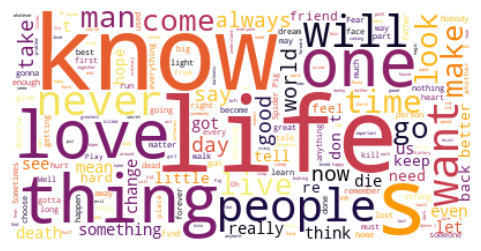

In [27]:
# Combine all text in the 'quote' column into one large string
text = " ".join(each for each in df['quote'])

# Create the wordcloud object with background and color map
wordcloud = WordCloud(background_color="white", colormap='inferno').generate(text)

# Display using matplotlib
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")  # Hide axes
plt.show()



- All quotes are joined into a single string
- `WordCloud().generate(text)` builds the image
- `imshow()` displays it like a picture
- `interpolation='bilinear'` smooths the edges

Color and background can be changed to fit the theme.

---

In [28]:
# Import Venn diagram tool
from matplotlib_venn import venn2, venn2_unweighted

# Define two sample sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])


Venn diagrams show the relationship between two or more sets — what they share, and what they don't.

c:\Users\Babichka\miniconda3\envs\dsi_participant\lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



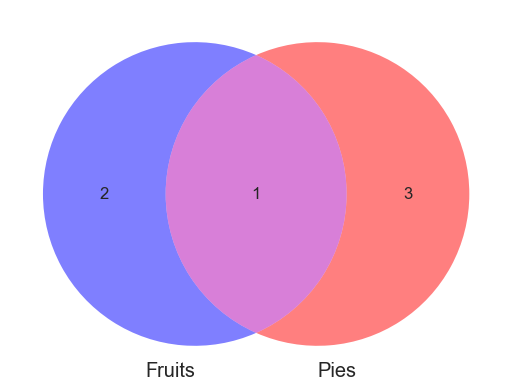

In [29]:
# Create the Venn diagram with set labels and custom colors
diagram = venn2_unweighted([A, B],
                           set_labels=('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

plt.show()



- The overlapping section shows items in both sets (e.g., "apple")
- Color + transparency (`alpha`) help show intersecting areas
- This version uses raw set sizes (unweighted)

Simple and clear way to show relationships between categories.

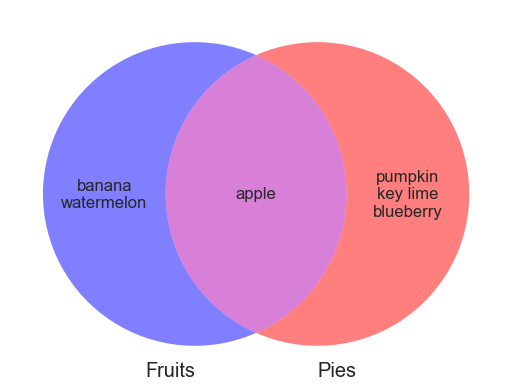

In [ ]:
# Recreate the same diagram
diagram = venn2_unweighted([A, B],
                           set_labels=('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

# Change text inside each section manually
diagram.get_label_by_id("10").set_text("\n".join(A - B))  # Only in A
diagram.get_label_by_id("11").set_text("\n".join(A & B))  # In both
diagram.get_label_by_id("01").set_text("\n".join(B - A))  # Only in B

plt.show()


Use `get_label_by_id()` with:
- `"10"` = only in first set (A)
- `"01"` = only in second set (B)
- `"11"` = in both sets

This allows displaying exact item names instead of just counts.